<a href="https://www.kaggle.com/code/zulqarnain11/covid-image-classification-using-cnn?scriptVersionId=268921541" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🦠 COVID-19 Chest X-Ray Image Classification using CNN (99% Accuracy)

# -------------------------------------------------------------
## 📘 About Dataset
# -------------------------------------------------------------
 This dataset (COVID19 Image Dataset) consists of chest X-ray images
### categorized into three classes:
 1. COVID
 2. Normal
 3. Viral Pneumonia


# -------------------------------------------------------------
## 📦 Import Libraries
# -------------------------------------------------------------

In [113]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory

# -------------------------------------------------------------
## 📂 Download Dataset
# -------------------------------------------------------------


In [114]:
# Download latest version
path = kagglehub.dataset_download("pranavraikokte/covid19-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'covid19-image-dataset' dataset.
Path to dataset files: /kaggle/input/covid19-image-dataset


In [115]:
train_dir=os.path.join(path,'Covid19-dataset','train')
test_dir=os.path.join(path,'Covid19-dataset','test')

# -------------------------------------------------------------
## 🖼️ Load Images
# -------------------------------------------------------------


In [116]:
train_ds=image_dataset_from_directory(train_dir,image_size=(224,224),batch_size=32,shuffle=True)
test_ds=image_dataset_from_directory(test_dir,image_size=(224,224),batch_size=32,shuffle=True)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [117]:
class_names=train_ds.class_names
n_classes=len(class_names)
print(class_names)
print(n_classes)

['Covid', 'Normal', 'Viral Pneumonia']
3


# -------------------------------------------------------------
## 🧹 Preprocessing - Rescaling
# -------------------------------------------------------------

In [118]:
def image_resize_and_rescale(img):
  img=img/255.0
  img=tf.image.resize(img,[224,224])
  return img

In [119]:
train_ds=train_ds.map(lambda x,y: (image_resize_and_rescale(x),y))
test_ds=test_ds.map(lambda x,y: (image_resize_and_rescale(x),y))



# -------------------------------------------------------------
## 🔄 Data Augmentation
# -------------------------------------------------------------

In [120]:
augment_data = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1)
])

# apply augmentation properly
augmented_ds = train_ds.map(lambda x, y: (augment_data(x, training=True), y))


In [121]:
train_ds=train_ds.concatenate(augmented_ds)

# -------------------------------------------------------------
## ⚙️ Optimize Performance
# -------------------------------------------------------------


In [122]:
autotune=tf.data.AUTOTUNE
train_ds=train_ds.cache().prefetch(buffer_size=autotune)
test_ds=test_ds.cache().prefetch(buffer_size=autotune)

# -------------------------------------------------------------
## 🧱 CNN Model Architecture
# -------------------------------------------------------------


In [123]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(n_classes,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
train_size = 0.8
train_dataset = train_ds.take(int(len(train_ds) * train_size))
val_dataset = train_ds.skip(int(len(train_ds) * train_size))


# -------------------------------------------------------------
## 🚀 Train Model
# -------------------------------------------------------------


In [125]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=8, monitor='val_accuracy', mode='max', restore_best_weights=True)
history=model.fit(train_dataset,epochs=50,validation_data=val_dataset,verbose=2,callbacks=[early_stopping])

Epoch 1/50
12/12 - 31s - 3s/step - accuracy: 0.4274 - loss: 1.2081 - val_accuracy: 0.5122 - val_loss: 1.0563
Epoch 2/50
12/12 - 1s - 68ms/step - accuracy: 0.4723 - loss: 1.0362 - val_accuracy: 0.6098 - val_loss: 1.0254
Epoch 3/50
12/12 - 1s - 62ms/step - accuracy: 0.6887 - loss: 0.7816 - val_accuracy: 0.5610 - val_loss: 0.8922
Epoch 4/50
12/12 - 1s - 62ms/step - accuracy: 0.7230 - loss: 0.6883 - val_accuracy: 0.6098 - val_loss: 0.8877
Epoch 5/50
12/12 - 1s - 62ms/step - accuracy: 0.7573 - loss: 0.5847 - val_accuracy: 0.5691 - val_loss: 0.8433
Epoch 6/50
12/12 - 1s - 63ms/step - accuracy: 0.7573 - loss: 0.5360 - val_accuracy: 0.7317 - val_loss: 0.7072
Epoch 7/50
12/12 - 1s - 62ms/step - accuracy: 0.8734 - loss: 0.3511 - val_accuracy: 0.6992 - val_loss: 0.6803
Epoch 8/50
12/12 - 1s - 70ms/step - accuracy: 0.8522 - loss: 0.3759 - val_accuracy: 0.7480 - val_loss: 0.6164
Epoch 9/50
12/12 - 1s - 64ms/step - accuracy: 0.8839 - loss: 0.2793 - val_accuracy: 0.7398 - val_loss: 0.5646
Epoch 10/50

# -------------------------------------------------------------
## 📈 Visualize Training Performance
# -------------------------------------------------------------

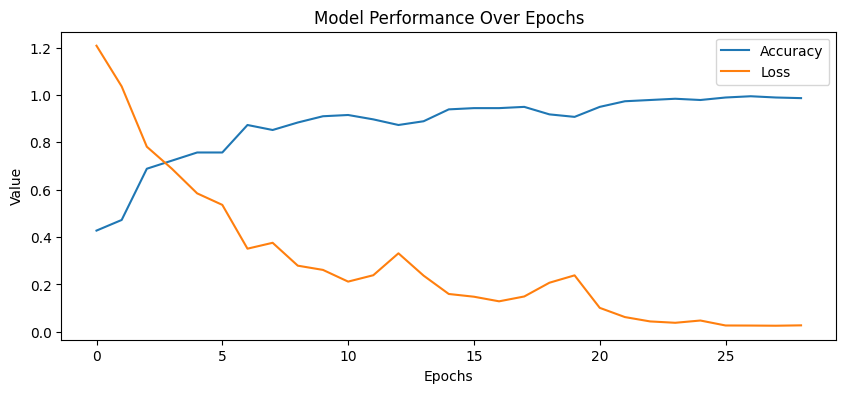

In [126]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Performance Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


# -------------------------------------------------------------
## 🧪 Evaluate Model
# -------------------------------------------------------------


In [127]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.9231 - loss: 0.2749
✅ Test Accuracy: 92.42%


# -------------------------------------------------------------
## 🔍 Confusion Matrix & Classification Report
# -------------------------------------------------------------


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


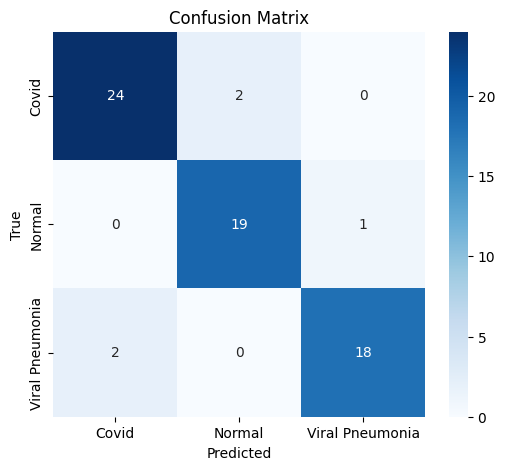

📊 Classification Report:
                 precision    recall  f1-score   support

          Covid       0.92      0.92      0.92        26
         Normal       0.90      0.95      0.93        20
Viral Pneumonia       0.95      0.90      0.92        20

       accuracy                           0.92        66
      macro avg       0.93      0.92      0.92        66
   weighted avg       0.92      0.92      0.92        66



In [128]:
from sklearn.metrics import classification_report
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))